# Surf map

In [1]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Current directory:", current_directory)


Current directory: /home/sunzid/Research/23-24_Automatic-Control-Lab/LLMSim


In [2]:
import os

new_directory = '/home/sunzid/LLMSim'

# Change the current working directory
os.chdir(new_directory)

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


In [4]:
# Read data

# folder_path = 'Collection1/'
folder_path = 'Collection22/'
olfaction_1_csv = '*_1_olfaction.csv'
olfaction_csv = '*_olfaction.csv'

olfaction_files = glob.glob(folder_path + olfaction_csv)
olfaction_1_files = glob.glob(folder_path + olfaction_1_csv)

grid = pd.read_csv('grid.csv')

sensor_template = pd.read_csv('Ordered_Olfaction.csv')

print(len(olfaction_1_files))

25


In [ ]:
# Process data

x_list = []
y_list = []
x_list1 = []
y_list1 = []
direction_list = []
plume_list = []
glb_wind_blow_dir_list = []
wind_spd_list = []

for file in olfaction_files:
    df = pd.read_csv(file)
    x_list.append(float(file.split('/')[-1].split('_')[0]))
    y_list.append(float(file.split('/')[-1].split('_')[1]))
    direction_list.append(int(file.split('/')[-1].split('_')[2]))
    plume_list.append(round(df.plume.mean()))

olfaction_1 = pd.DataFrame({'x': x_list, 'y': y_list, 'direction': direction_list,
              'plume': plume_list})

for file in olfaction_1_files:
    df1 = pd.read_csv(file)
    x_list1.append(float(file.split('/')[-1].split('_')[0]))
    y_list1.append(float(file.split('/')[-1].split('_')[1]))
    glb_wind_blow_dir_list.append(round(df1.glbWindBlowDir.mean(), 2))
    wind_spd_list.append(round(df1.windSpd.mean(), 2))

olfaction_2 = pd.DataFrame({'x': x_list1, 'y': y_list1,
              'glb_wnd_blw_dir': glb_wind_blow_dir_list, 'wind_spd': wind_spd_list})

olfaction = olfaction_1.merge(olfaction_2, on=['x', 'y'], how='inner')

ordered_olfaction  = grid.merge(olfaction, on=['x', 'y'], how='inner')

ordered_olfaction_1dir = ordered_olfaction[ordered_olfaction['direction']==1]

ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)

/tmp/ipykernel_21261/3759403110.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)


In [ ]:
print(len(ordered_olfaction_1dir))
ordered_olfaction_1dir

25


,x,y,direction,plume,glb_wnd_blw_dir,wind_spd
0,0.2,-0.2,1,772.0,192.52,0.30
6,0.1,0.4,1,778.0,151.07,1.71
11,0.0,1.0,1,784.0,178.13,1.02
13,-0.1,1.6,1,792.0,186.99,1.34
16,-0.2,2.2,1,797.0,147.86,0.22
23,0.8,-0.1,1,760.0,200.19,0.43
25,0.7,0.5,1,723.0,160.40,2.06
29,0.6,1.1,1,702.0,178.51,0.96
35,0.5,1.7,1,710.0,196.69,1.29
39,0.4,2.3,1,804.0,229.58,0.16


## 3D Table??

In [ ]:
import numpy as np
import pandas as pd

# Example input data for meshgrid
x = np.arange(1, 6)  # X-axis points
y = np.arange(1, 6)  # Y-axis points
X, Y = np.meshgrid(x, y)

# Example input data arrays
plume = np.array(ordered_olfaction_1dir.plume).reshape((len(Y), len(X)))
wind_dir = np.array(ordered_olfaction_1dir.glb_wnd_blw_dir).reshape((len(Y), len(X)))
wind_spd = np.array(ordered_olfaction_1dir.wind_spd).reshape((len(Y), len(X)))

# Stack the data arrays into a single 3D array
combined_values = np.stack((plume, wind_dir, wind_spd), axis=-1)

# Function to convert array rows into tuples
def to_tuple(array):
    return [tuple(x) for x in array]

# Convert each row into tuples
tuples_data = [to_tuple(row) for row in combined_values]

# Create a DataFrame from the tuples data
df = pd.DataFrame(tuples_data, index=y, columns=x)

# Flip the columns (x-axis) and the rows (y-axis)
df = df.iloc[::-1].iloc[:, ::-1]

df.to_csv('3d_table.csv')


## Surf graph for plume

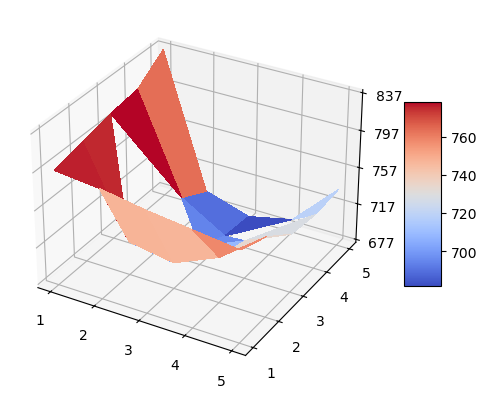

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

plume = np.array(ordered_olfaction_1dir.plume).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, plume, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Surf graph for wind direction

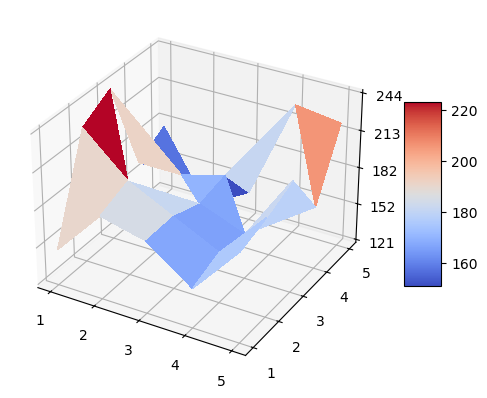

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

wind_dir = np.array(ordered_olfaction_1dir.glb_wnd_blw_dir).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, wind_dir, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Surf graph for wind speed

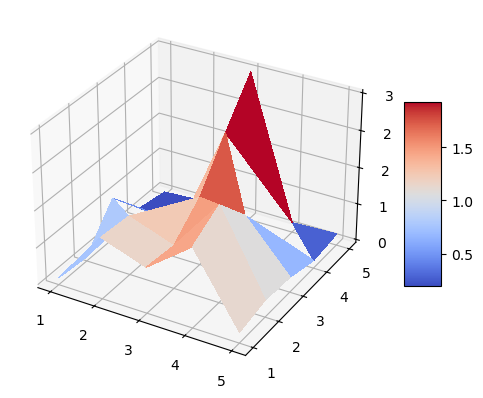

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

wind_spd = np.array(ordered_olfaction_1dir.wind_spd).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, wind_spd, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# LLM Translation

In [ ]:
import os

new_directory = '/home/sunzid/LLMSim'

# Change the current working directory
os.chdir(new_directory)

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


## Sensor data
Sensor data is based on simulation data at present.
In experiment it will be live data in 4 directions of the current location.

### Read simulation data

In [ ]:
# folder_path = 'Collection1/'
olfaction_folder_pathfolder_path = 'Collection22/'
olfaction_1_csv = '*_1_olfaction.csv'
olfaction_csv = '*_olfaction.csv'

olfaction_files = glob.glob(folder_path + olfaction_csv)
olfaction_1_files = glob.glob(folder_path + olfaction_1_csv)

grid = pd.read_csv('grid.csv')

sensor_template = pd.read_csv('Ordered_Olfaction.csv') # sorted coordinate - direction, with obstacle data

print(len(olfaction_1_files))

25


In [ ]:
# Process data

x_list = []
y_list = []
x_list1 = []
y_list1 = []
direction_list = []
plume_list = []
glb_wind_blow_dir_list = []
wind_spd_list = []

for file in olfaction_files:
    df = pd.read_csv(file)
    x_list.append(float(file.split('/')[-1].split('_')[0]))
    y_list.append(float(file.split('/')[-1].split('_')[1]))
    direction_list.append(int(file.split('/')[-1].split('_')[2]))
    plume_list.append(round(df.plume.mean()))

olfaction_1 = pd.DataFrame({'x': x_list, 'y': y_list, 'direction': direction_list,
              'plume': plume_list})

for file in olfaction_1_files:
    df1 = pd.read_csv(file)
    x_list1.append(float(file.split('/')[-1].split('_')[0]))
    y_list1.append(float(file.split('/')[-1].split('_')[1]))
    glb_wind_blow_dir_list.append(round(df1.glbWindBlowDir.mean(), 2))
    wind_spd_list.append(round(df1.windSpd.mean(), 2))

olfaction_2 = pd.DataFrame({'x': x_list1, 'y': y_list1,
              'glb_wnd_blw_dir': glb_wind_blow_dir_list, 'wind_spd': wind_spd_list})

olfaction = olfaction_1.merge(olfaction_2, on=['x', 'y'], how='inner')

ordered_olfaction  = grid.merge(olfaction, on=['x', 'y'], how='inner')

ordered_olfaction_1dir = ordered_olfaction[ordered_olfaction['direction']==1]

ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)

/tmp/ipykernel_13679/3428060479.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[772. 778. 784. 792. 797. 760. 723. 702. 710. 804. 737. 715. 694.  nan
 811. 733.  nan 680. 709. 815. 736. 688. 677. 692. 837.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)


In [ ]:
ordered_olfaction = sensor_template.merge(ordered_olfaction.reset_index(drop=True), on=['x', 'y', 'direction'], how='inner')
ordered_olfaction = ordered_olfaction.drop(ordered_olfaction.columns[0], axis=1)
# ordered_olfaction.to_csv("ordered_olfaction.csv")
ordered_olfaction

,x,y,direction,obstacle,plume,glb_wnd_blw_dir,wind_spd
0,0.2,-0.2,1,No,772,192.52,0.30
1,0.2,-0.2,2,No,772,192.52,0.30
2,0.2,-0.2,3,Yes,771,192.52,0.30
3,0.2,-0.2,4,Yes,771,192.52,0.30
4,0.1,0.4,1,No,778,151.07,1.71
...,...,...,...,...,...,...,...
95,2.3,2.0,4,No,692,120.96,0.19
96,2.2,2.6,1,Yes,837,178.70,0.14
97,2.2,2.6,2,Yes,836,178.70,0.14
98,2.2,2.6,3,No,826,178.70,0.14


## Map Transition

In [ ]:
xMap = pd.read_csv('x_Map.csv')
yMap = pd.read_csv('y_Map.csv')
xMap

,Col1,Col2,Col3,Col4,Col5
0,2.2,2.3,2.4,2.5,2.6
1,1.6,1.7,1.8,1.9,2.0
2,1.0,1.1,1.2,1.3,1.4
3,0.4,0.5,0.6,0.7,0.8
4,-0.2,-0.1,0.0,0.1,0.2


In [ ]:
actionID = ""
coordinate_row_ID = 4
coordinate_column_ID = 4

In [ ]:
if actionID == "":
    pass
elif actionID == 1:
    if coordinate_row_ID > 0:
        coordinate_row_ID -= 1
elif actionID == 2:
    if coordinate_column_ID > 0:
        coordinate_column_ID -= 1
elif actionID == 3:
    if coordinate_row_ID < 4:
        coordinate_row_ID += 1
elif actionID == 4:
    if coordinate_column_ID < 4:
        coordinate_column_ID += 1

coordinateX = xMap.iloc[coordinate_row_ID, coordinate_column_ID]
coordinateY = yMap.iloc[coordinate_row_ID, coordinate_column_ID]


## Translation of direction, chemical concentration and wind direction

In [ ]:
sensor_readings = ordered_olfaction[(ordered_olfaction['x'] == coordinateX) & (ordered_olfaction['y'] == coordinateY)]

# Initiating sensor translation file
sensor_translation = sensor_readings[['direction', 'obstacle', 'glb_wnd_blw_dir', 'plume']]

sensor_translation.rename(columns={'direction': 'Direction',
                                'obstacle': 'Facing_Obstacle',
                                'plume' : 'Facing_Odor',
                                'glb_wnd_blw_dir':'Facing_Airflow'}
                                , inplace=True)


# Translate direction
sensor_translation.iloc[0, 2] = "Front"
sensor_translation.iloc[1, 2] = "Left"
sensor_translation.iloc[2, 2] = "Back"
sensor_translation.iloc[3, 2] = "Right"


# Translate plume
medianPlume = sensor_translation.loc[:, 'Facing_Odor'].median()
sensor_translation.loc[:, 'Facing_Odor'] = np.where(sensor_translation['Facing_Odor'] < medianPlume, "Low", "High")

# Translate Wind direcrtion
windDir = sensor_readings['glb_wnd_blw_dir'].max()
print(windDir)

windDirFlag = 2 # back
if 45 < windDir < 134:    # left
    windDirFlag = 1
elif 135 < windDir < 224: # front
    windDirFlag = 0
elif 225 < windDir < 314: # right
    windDirFlag = 3
elif windDir > 315:
    windDirFlag = 2 # back
print(windDirFlag)

sensor_translation.loc[:, 'Facing_Airflow'] = "No"
sensor_translation.iloc[windDirFlag, 2] = "Yes"

sensor_translation.loc[:, 'Facing_Objects'] = ''
sensor_translation.loc[:, 'Facing_Odor_Source'] = ''


## Translation of Vision

In [ ]:
from ultralytics import YOLO

trainedModel = YOLO('/home/sunzid/yolov8/runs/detect/train3/weights/best.pt')

vision_folder_path = 'meta_data/'

visionObjectPrompt = """
You are a plume emitting object detector. You will be provided with a list of objects, and you need to determine if an object in the list can emit plume.
Respond only with the corresponding decision 'Yes' or 'No' without any additional text or punctuation.
If you get an empty list, output 'No' without any additional text or punctuation.
"""

from openai import OpenAI

client = OpenAI(api_key='sk-')


In [ ]:
j = 0
while j < 4:
    vision_csv = f'{coordinateX}_{coordinateY}_{j+1}_vision.png'
    vision_picture_path = glob.glob(vision_folder_path + vision_csv)
    result = trainedModel(vision_picture_path)

    detected_objects = [trainedModel.names[int(box.cls[0])] for box in result[0].boxes]
    object_counts = {obj: detected_objects.count(obj) for obj in set(detected_objects)}
    object_output = ", ".join([f"{count} {obj}" for obj, count in object_counts.items()])

    completion = client.chat.completions.create(
        model="gpt-4",
        messages=[
        {"role": "system", "content": visionObjectPrompt},
        {"role": "user", "content": object_output}])

    visionDetectionOutput = completion.choices[0].message.content.strip()

    # sensor_translation[(sensor_translation['x'] == coordinateX) & (sensor_translation['y'] == coordinateY)] = output
    sensor_translation.iloc[j, 4] = object_output
    sensor_translation.iloc[j, 5] = visionDetectionOutput

    j += 1


0: 480x640 1 Coke can, 1 Humidifier, 1 Humidifier box, 10.1ms
Speed: 17.9ms preprocess, 10.1ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.4ms
Speed: 3.1ms preprocess, 9.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Cardboard box, 9.1ms
Speed: 2.5ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Cardboard boxs, 9.1ms
Speed: 2.5ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


,Direction,Facing_Obstacle,Facing_Airflow,Facing_Odor,Facing_Objects,Plume_Source,Facing_Odor_Source
44,1,Yes,Yes,High,"1 Humidifier, 1 Coke can, 1 Humidifier box",No,
45,2,No,No,Low,,No,
46,3,No,No,Low,1 Cardboard box,No,
47,4,No,No,High,2 Cardboard box,No,


## Prompt

In [ ]:
robot_goal = """

Your task is to determine the best direction for a mobile robot to move towards an odor source.
The possible directions and their corresponding numerical values are:
- 'Front' = 1
- 'Left' = 2
- 'Back' = 3
- 'Right' = 4

The decision should be based on the following criteria:

- Facing_Obstacles: Direction with obstacle CANNOT BE SELECTED.
- Facing_Odor_Source: With with odor source SHOULD BE SELECTED.
- Facing_Airflow: Airflow from a direction suggests the odor source is in that direction.
- Facing_Odor: High odor concentration in the direction indicates the presence of the odor source.

Sensor Data:
"""

task = """
Based on this sensor data, classify the best direction for the robot to approach the odor source.
Respond only with the corresponding numerical value: 0, 1, 2, or 3 without any additional text or punctuation.
"""



In [ ]:
sensorMD = sensor_translation.to_markdown(index=False)

robot_prompt = robot_goal + "\n" + sensorMD + "\n" + task

print(robot_prompt)




Your task is to determine the best direction for a mobile robot to move towards an odor source.
The possible directions and their corresponding numerical values are:
- 'Front' = 1
- 'Left' = 2
- 'Back' = 3
- 'Right' = 4

The decision should be based on the following criteria:

- Facing_Odor: High odor concentration in the direction indicates the presence of the odor source.
- Facing_Objects: Objects that can emit vapor or odor suggest the direction of the odor source.
- Facing_Airflow: Airflow from a direction suggests the odor source is in that direction.
- Facing_Obstacles: Direction with obstacle cannot be selected.

Sensor Data:

|   Direction | Facing_Obstacle   | Facing_Airflow   | Facing_Odor   | Facing_Objects   |
|------------:|:------------------|:-----------------|:--------------|:-----------------|
|           1 | Yes               | Yes              | High          | 1 Cardboard box  |
|           2 | No                | No               | Low           | 1 Cardboard box

## LLM navigation

### BERT Classification

In [ ]:
from transformers import pipeline
BERTClassifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

candidate_labels = ['Front', 'Back', 'Right', 'Left']

/home/sunzid/anaconda3/envs/hugging-face/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

scores = BERTClassifier(robot_prompt, candidate_labels)['scores']

actionID = np.argmax(scores)

print(scores, actionID)

[0.35304316878318787, 0.33214887976646423, 0.19439224898815155, 0.12041562795639038] 0


### GPT

In [ ]:
from openai import OpenAI

client = OpenAI(api_key='sk-')


1


In [ ]:

completion = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are an assistant that helps determine the best direction for a mobile robot."},
    {"role": "user", "content": robot_prompt}
  ]
)

# Extract the content part from the completion
actionID = int(completion.choices[0].message.content.strip())
print(actionID)


## Function

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Change the current working directory
new_directory = '/home/sunzid/LLMSim'
os.chdir(new_directory)

olfaction_folder_path = 'Collection22/'
olfaction_1_csv_path = '*_1_olfaction.csv'
olfaction_csv_path = '*_olfaction.csv'
grid_path = 'grid.csv'
sensor_template_path = 'Ordered_Olfaction.csv'

xMap = pd.read_csv('x_Map.csv')
yMap = pd.read_csv('y_Map.csv')

actionID = ""

from openai import OpenAI

client = OpenAI(api_key='sk-')
visionObjectPrompt = """
You are a plume emitting object detector. You will be provided with a list of objects, and you need to determine if an object in the list can emit plume.
Respond only with the corresponding decision 'Yes' or 'No' without any additional text or punctuation.
If you get an empty list, output 'No' without any additional text or punctuation.
"""
from ultralytics import YOLO

trainedModel = YOLO('/home/sunzid/yolov8/runs/detect/train3/weights/best.pt')

vision_folder_path = 'meta_data/'


def read_data(olfaction_folder_path, olfaction_1_csv_path, olfaction_csv_path, grid_path, sensor_template_path):
    # folder_path = 'Collection1/'

    olfaction_files = glob.glob(olfaction_folder_path + olfaction_csv_path)
    olfaction_1_files = glob.glob(olfaction_folder_path + olfaction_1_csv_path)

    grid = pd.read_csv(grid_path)

    sensor_template = pd.read_csv(sensor_template_path)

    if len(olfaction_1_files) == 0:
        return False
    
    # Process data

    x_list = []
    y_list = []
    x_list1 = []
    y_list1 = []
    direction_list = []
    plume_list = []
    glb_wind_blow_dir_list = []
    wind_spd_list = []

    for file in olfaction_files:
        df = pd.read_csv(file)
        x_list.append(float(file.split('/')[-1].split('_')[0]))
        y_list.append(float(file.split('/')[-1].split('_')[1]))
        direction_list.append(int(file.split('/')[-1].split('_')[2]))
        plume_list.append(round(df.plume.mean()))

    olfaction_1 = pd.DataFrame({'x': x_list, 'y': y_list, 'direction': direction_list,
                'plume': plume_list})

    for file in olfaction_1_files:
        df1 = pd.read_csv(file)
        x_list1.append(float(file.split('/')[-1].split('_')[0]))
        y_list1.append(float(file.split('/')[-1].split('_')[1]))
        glb_wind_blow_dir_list.append(round(df1.glbWindBlowDir.mean(), 2))
        wind_spd_list.append(round(df1.windSpd.mean(), 2))

    olfaction_2 = pd.DataFrame({'x': x_list1, 'y': y_list1,
                'glb_wnd_blw_dir': glb_wind_blow_dir_list, 'wind_spd': wind_spd_list})

    olfaction = olfaction_1.merge(olfaction_2, on=['x', 'y'], how='inner')

    ordered_olfaction  = grid.merge(olfaction, on=['x', 'y'], how='inner')

    ordered_olfaction_1dir = ordered_olfaction[ordered_olfaction['direction']==1]

    ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)
        
    ordered_olfaction = sensor_template.merge(ordered_olfaction.reset_index(drop=True), on=['x', 'y', 'direction'], how='inner')
    ordered_olfaction = ordered_olfaction.drop(ordered_olfaction.columns[0], axis=1)
    
    return ordered_olfaction

def mapTransition(actionID, coordinate_row_ID, coordinate_column_ID):

    if actionID == "":
        pass
    elif actionID == 1:
        if coordinate_row_ID > 0:
            coordinate_row_ID -= 1
    elif actionID == 2:
        if coordinate_column_ID > 0:
            coordinate_column_ID -= 1
    elif actionID == 3:
        if coordinate_row_ID < 4:
            coordinate_row_ID += 1
    elif actionID == 4:
        if coordinate_column_ID < 4:
            coordinate_column_ID += 1

    coordinateX = xMap.iloc[coordinate_row_ID, coordinate_column_ID]
    coordinateY = yMap.iloc[coordinate_row_ID, coordinate_column_ID]

    if coordinateX == 2.4: return True

    return coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID

def sensorTransition(sensor_readings):
    # Initiating sensor translation file
    sensor_translation = sensor_readings[['direction', 'obstacle', 'glb_wnd_blw_dir', 'plume']]

    sensor_translation.rename(columns={'direction': 'Direction',
                                    'obstacle': 'Facing_Obstacle',
                                    'plume' : 'Facing_Odor',
                                    'glb_wnd_blw_dir':'Facing_Airflow'}
                                    , inplace=True)


    # Translate direction
    sensor_translation.iloc[0, 2] = "Front"
    sensor_translation.iloc[1, 2] = "Left"
    sensor_translation.iloc[2, 2] = "Back"
    sensor_translation.iloc[3, 2] = "Right"


    # Translate plume
    medianPlume = sensor_translation.loc[:, 'Facing_Odor'].median()
    sensor_translation.loc[:, 'Facing_Odor'] = np.where(sensor_translation['Facing_Odor'] < medianPlume, "Low", "High")

    # Translate Wind direcrtion
    windDir = sensor_readings['glb_wnd_blw_dir'].max()
    print(windDir)

    windDirFlag = 2 # back
    if 45 < windDir < 134:    # left
        windDirFlag = 1
    elif 135 < windDir < 224: # front
        windDirFlag = 0
    elif 225 < windDir < 314: # right
        windDirFlag = 3
    elif windDir > 315:
        windDirFlag = 2 # back
    print(windDirFlag)

    sensor_translation.loc[:, 'Facing_Airflow'] = "No"
    sensor_translation.iloc[windDirFlag, 2] = "Yes"

    return sensor_translation

def visionModel(sensor_translation, coordinateX, coordinateY, vision_folder_path):
    j = 0
    while j < 4:
        vision_csv = f'{coordinateX}_{coordinateY}_{j+1}_vision.png'
        vision_picture_path = glob.glob(vision_folder_path + vision_csv)
        result = trainedModel(vision_picture_path)

        detected_objects = [trainedModel.names[int(box.cls[0])] for box in result[0].boxes]
        object_counts = {obj: detected_objects.count(obj) for obj in set(detected_objects)}
        object_output = ", ".join([f"{count} {obj}" for obj, count in object_counts.items()])

        completion = client.chat.completions.create(
            model="gpt-4",
            messages=[
            {"role": "system", "content": visionObjectPrompt},
            {"role": "user", "content": object_output}])

        visionDetectionOutput = completion.choices[0].message.content.strip()

        # sensor_translation[(sensor_translation['x'] == coordinateX) & (sensor_translation['y'] == coordinateY)] = output
        sensor_translation.iloc[j, 4] = object_output
        sensor_translation.iloc[j, 5] = visionDetectionOutput

        j += 1
    return sensor_translation




robot_goal = """
Your task is to determine the best direction for a mobile robot to move towards an odor source.
The possible directions and their corresponding numerical values are:
- 'Front' = 1
- 'Left' = 2
- 'Back' = 3
- 'Right' = 4

The decision should be based on the following criteria:

1. Directions with obstacles (Facing_Obstacle = Yes) CANNOT be selected.
2. Directions facing the odor source (Facing_Odor_Source = Yes) SHOULD be prioritized.
3. If there is airflow (Facing_Airflow = Yes), the odor source may be in that direction.
4. High odor concentration (Facing_Odor = High) indicates the odor source.

Sensor Data:
"""

task = """
Based on this sensor data, classify the best direction for the robot to approach the odor source.
Respond only with the corresponding numerical value: 0, 1, 2, or 3 without any additional text or punctuation.
"""


from collections import Counter
def get_action_id(prompt):
    completion = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are an assistant that helps determine the best direction for a mobile robot."},
            {"role": "user", "content": prompt}
        ]
    )
    # Extract the content part from the completion
    actionID = int(completion.choices[0].message.content.strip())
    return actionID


def LLMROSL(olfaction_folder_path, vision_folder_path, coordinateX = 0.2, coordinateY = -0.2, coordinate_row_ID = 4, coordinate_column_ID = 4, actionID = ""):
    coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID = mapTransition(actionID, coordinate_row_ID, coordinate_column_ID)

    olfaction_1_csv_path = '*_1_olfaction.csv'
    olfaction_csv_path = '*_olfaction.csv'
    grid_path = 'grid.csv'
    sensor_template_path = 'Ordered_Olfaction.csv'
    ordered_olfaction = read_data(olfaction_folder_path, olfaction_1_csv_path, olfaction_csv_path, grid_path, sensor_template_path)

    # Sensor readings
    sensor_readings = ordered_olfaction[(ordered_olfaction['x'] == coordinateX) & (ordered_olfaction['y'] == coordinateY)]

    sensor_translation = sensorTransition(sensor_readings)

    sensor_translation.loc[:, 'Facing_Objects'] = ''
    sensor_translation.loc[:, 'Facing_Odor_Source'] = ''

    sensor_translation = visionModel(sensor_translation, coordinateX, coordinateY, vision_folder_path)

    sensorMD = sensor_translation.loc[:,['Direction', 'Facing_Obstacle', 'Facing_Odor_Source', 'Facing_Airflow', 'Facing_Odor']].to_markdown(index=False)

    robot_prompt = robot_goal + "\n" + sensorMD + "\n" + task



    # Run the completion process 5 times
    actionID = [get_action_id(robot_prompt) for _ in range(5)]

    # Calculate the mode of the action IDs
    actionID = Counter(actionID).most_common(1)[0][0]

    return coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID, robot_prompt, actionID

/home/sunzid/anaconda3/envs/hugging-face/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
olfaction_folder_path = 'Collection21/'
vision_folder_path = 'meta_data/'

coordinate_row_ID = 4
coordinate_column_ID = 4

coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID = mapTransition(actionID, coordinate_row_ID, coordinate_column_ID)

print(coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID)

0.2 -0.2 4 4


In [ ]:

n = 8

i = 0
while i < n:
    coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID, robot_prompt, actionID = LLMROSL(olfaction_folder_path, vision_folder_path, coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID, actionID)
    if coordinateX == 2.4:break
    i += 1
    print()
    print('-------------------------------------------------------')
    print("i=",i)
    print(coordinateX, coordinateY)
    print(robot_prompt)
    print(actionID)
    print('-------------------------------------------------------')
    print()


# DiLU

## Reasoning Module - done

In [ ]:
class DriverAgent:
    # Other parts of the class

    def few_shot_decision(self, scenario_description, previous_decisions, available_actions, driving_intentions, fewshot_messages, fewshot_answers):
        # Constructing the system message and human message
        # Sending the prompts to LLM and processing the response
        response_content = ""
        for chunk in self.llm.stream(messages):
            response_content += chunk.content
            print(chunk.content, end="", flush=True)
        decision_action = response_content.split(delimiter)[-1]
        result = int(decision_action)
        return result, response_content, human_message, few_shot_answers_store


## Memory Module

In [ ]:
class DrivingMemory:
    def addMemory(self, sce_descrip, human_question, response, action, sce=None, comments=""):
        doc = Document(
            page_content=sce_descrip,
            metadata={"human_question": human_question, 'LLM_response': response, 'action': action, 'comments': comments}
        )
        self.scenario_memory.add_documents([doc])

    def retriveMemory(self, driving_scenario, frame_id, top_k=5):
        query_scenario = driving_scenario.describe(frame_id)
        similarity_results = self.scenario_memory.similarity_search_with_score(query_scenario, k=top_k)
        return [result[0].metadata for result in similarity_results]

## Reflection Module

In [ ]:
# Reasoning Module

# Result Analysis

Graph result

In [1]:
import pandas as pd
import os


path = '/home/sunzid/LLMSim'
os.chdir(path)

In [73]:
filePath = 'RobotRun'
run1 = pd.read_csv(f'{filePath}/run1_0.2_-0.2/trajectoryData.csv')
run2 = pd.read_csv(f'{filePath}/run2_0.1_0.4/trajectoryData.csv')
run3 = pd.read_csv(f'{filePath}/run3_0.0_1.0/trajectoryData.csv')

run2.loc[:,'time'] = run2.index+1
run3.loc[:,'time'] = run3.index+1

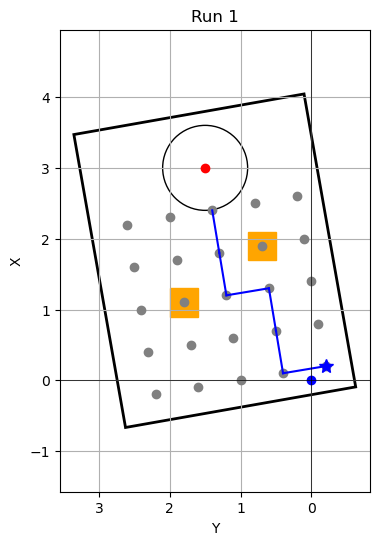

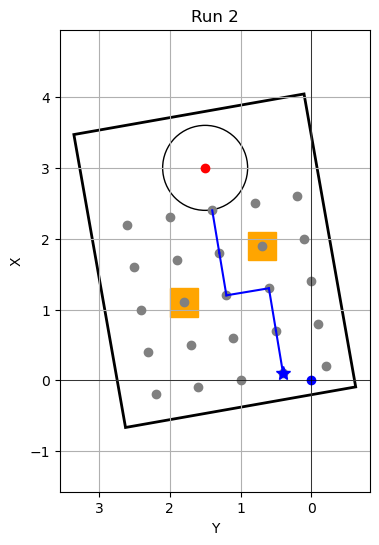

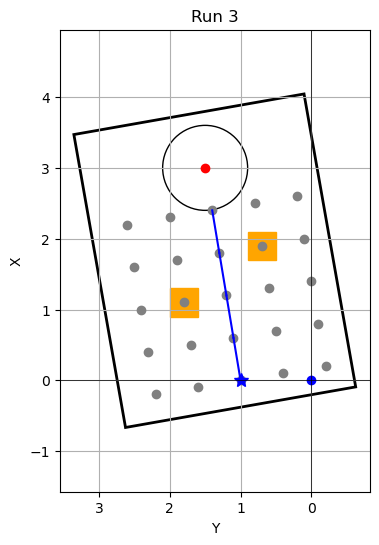

In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D

def robotTrajectory(time, x, y, name):
    plt.figure(figsize=(4, 6))
    plt.xlim(-2, 4)
    plt.ylim(-5, 5)

    plt.plot(1.6, -0.1, 'o', color='gray')
    plt.plot(2.2, -0.2, 'o', color='gray')
    plt.plot(1, 0, 'o', color='gray')
    plt.plot(0.4, 0.1, 'o', color='gray')
    plt.plot(-0.2, 0.2, 'o', color='gray')
    plt.plot(2.3, 0.4, 'o', color='gray')
    plt.plot(1.7, 0.5, 'o', color='gray')
    plt.plot(1.1, 0.6, 'o', color='gray')
    plt.plot(0.5, 0.7, 'o', color='gray')
    plt.plot(-0.1, 0.8, 'o', color='gray')
    plt.plot(2.4, 1, 'o', color='gray')
    plt.plot(1.8, 1.1, 'o', color='gray')
    plt.plot(1.2, 1.2, 'o', color='gray')
    plt.plot(0.6, 1.3, 'o', color='gray')
    plt.plot(0, 1.4, 'o', color='gray')
    plt.plot(2.5, 1.6, 'o', color='gray')
    plt.plot(1.9, 1.7, 'o', color='gray')
    plt.plot(1.3, 1.8, 'o', color='gray')
    plt.plot(0.7, 1.9, 'o', color='gray')
    plt.plot(0.1, 2, 'o', color='gray')
    plt.plot(2.6, 2.2, 'o', color='gray')
    plt.plot(2, 2.3, 'o', color='gray')
    plt.plot(1.4, 2.4, 'o', color='gray')
    plt.plot(0.8, 2.5, 'o', color='gray')
    plt.plot(0.2, 2.6, 'o', color='gray')

    for i in range(len(x) - 1):
        plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], color='b', linestyle='-')


    plt.title(name)
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.grid(True)

    plt.plot(x[0], y[0], marker='*', markersize=10, color='blue')
    plt.plot(0, 0, 'bo')
    plt.plot(1.5, 3.0, 'ro')
    circle = plt.Circle((1.5, 3.0), .6, color='black', fill=False)
    plt.gca().add_patch(circle)


    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    legend_lines = [
        Line2D([0], [0], color='blue', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='red', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='green', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='orange', linewidth=2, linestyle='-')
    ]

    # Define behavior labels for the legend
    behavior_labels = ['GPT-4', 'GPT-3.5', 'BERT', 'Gemini']

    # plt.legend(legend_lines, behavior_labels, loc='upper right', fontsize='small')

    square1 = patches.Rectangle((1.6, .9), 0.4, 0.4, linewidth=1, edgecolor='orange', facecolor='orange')
    plt.gca().add_patch(square1)

    square2 = patches.Rectangle((0.5, 1.7), 0.4, 0.4, linewidth=1, edgecolor='orange', facecolor='orange')
    plt.gca().add_patch(square2)

    rectangle = patches.Rectangle((-.6, -.2), 3.3, 4.2, linewidth=2, edgecolor='black', facecolor='none')
    center_rect = (-4.1 + 4.1, -1.65 + 1.65)
    rotation_rect = transforms.Affine2D().rotate_deg(-10).translate(*center_rect)
    rectangle.set_transform(rotation_rect + plt.gca().transData)
    plt.gca().add_patch(rectangle)

    plt.gca().invert_xaxis()
    plt.axis('equal')

    plt.show()

def graph(data, name):
    time = data.time
    x = data.y
    y = data.x
    name = name
    return robotTrajectory(time, x, y, name)

graph(run1, 'Run 1')
graph(run2, 'Run 2')
graph(run3, 'Run 3')